In [10]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

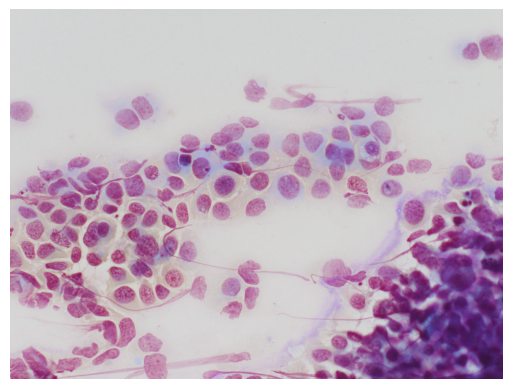

In [13]:
img = cv2.imread('Image_6385.jpg')
plt.imshow(img)
plt.axis('Off')
plt.show()

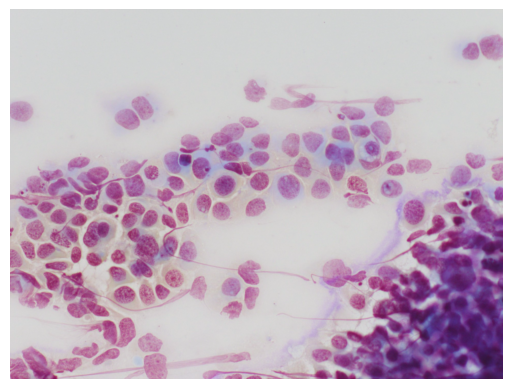

In [14]:
img_filtered = cv2.GaussianBlur(img,(5,5),sigmaX=1)
plt.imshow(img_filtered)
plt.axis('Off')
plt.show()

In [20]:
def gaussian_kernal(size, sigma):
    if size % 2 == 0 : 
        size = size + 1
    max_point = size // 2 
    min_point =  - max_point

    Kernal = np.zeros((size , size))
    for x in range(min_point, max_point+1):
        for y in range(min_point , max_point +1):
            value = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
            Kernal[x-min_point , y-min_point] = value 
    print(Kernal)
    return Kernal
    

In [21]:
kernel = gaussian_kernal(size = 5  ,sigma = 1.4 )

[[0.01054991 0.02267864 0.0292689  0.02267864 0.01054991]
 [0.02267864 0.04875119 0.06291796 0.04875119 0.02267864]
 [0.0292689  0.06291796 0.0812015  0.06291796 0.0292689 ]
 [0.02267864 0.04875119 0.06291796 0.04875119 0.02267864]
 [0.01054991 0.02267864 0.0292689  0.02267864 0.01054991]]


In [22]:
img = cv2.imread('Image_6385.jpg')


[[0.01342739 0.01706956 0.01849123 0.01706956 0.01342739]
 [0.01706956 0.02169966 0.02350696 0.02169966 0.01706956]
 [0.01849123 0.02350696 0.02546479 0.02350696 0.01849123]
 [0.01706956 0.02169966 0.02350696 0.02169966 0.01706956]
 [0.01342739 0.01706956 0.01849123 0.01706956 0.01342739]]
[[0.00542492 0.00576037 0.00587674 0.00576037 0.00542492]
 [0.00576037 0.00611658 0.00624014 0.00611658 0.00576037]
 [0.00587674 0.00624014 0.0063662  0.00624014 0.00587674]
 [0.00576037 0.00611658 0.00624014 0.00611658 0.00576037]
 [0.00542492 0.00576037 0.00587674 0.00576037 0.00542492]]
[[0.00152914 0.00155225 0.00156003 0.00155225 0.00152914]
 [0.00155225 0.00157571 0.00158361 0.00157571 0.00155225]
 [0.00156003 0.00158361 0.00159155 0.00158361 0.00156003]
 [0.00155225 0.00157571 0.00158361 0.00157571 0.00155225]
 [0.00152914 0.00155225 0.00156003 0.00155225 0.00152914]]


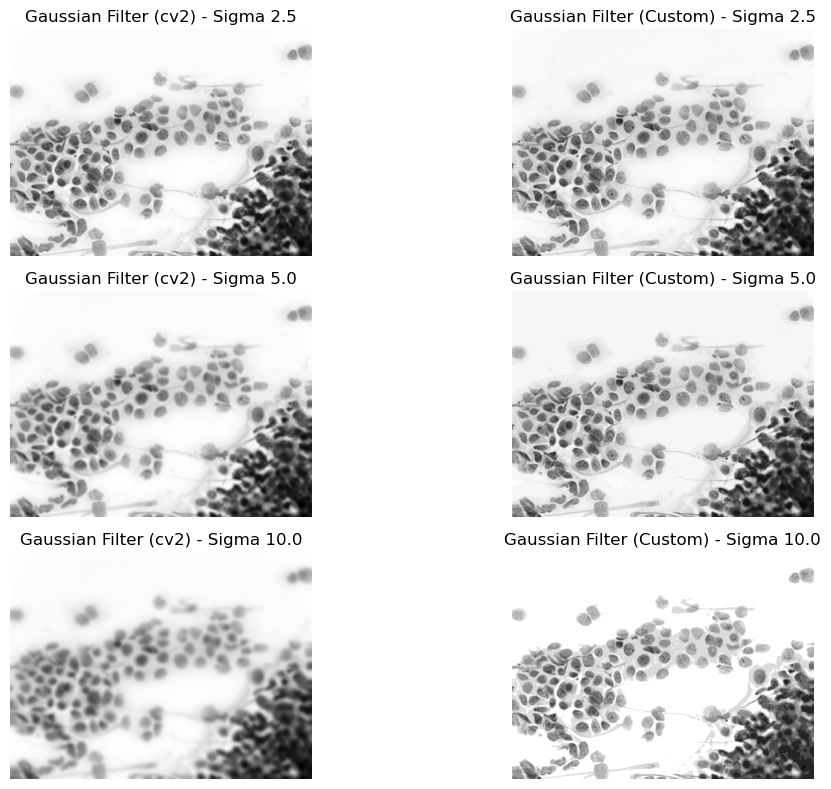

In [27]:
img = cv2.imread('Image_6385.jpg',0) 

# Các giá trị sigma cần thử
sigma_values = [2.5, 5.0, 10.0]

# Tạo một figure để hiển thị các ảnh
plt.figure(figsize=(12, 8))

# Lặp qua từng giá trị sigma và áp dụng Gaussian Filter theo 2 cách
for i, sigma in enumerate(sigma_values):
    # Áp dụng Gaussian Filter bằng cách sử dụng hàm GaussianBlur của OpenCV
    img_blur_cv2 = cv2.GaussianBlur(img, (0, 0), sigma)
    
    # Áp dụng Gaussian Filter bằng cách sử dụng hàm gaussian_kernel đã tự định nghĩa
    kernel = gaussian_kernal(5, sigma)  # Sử dụng kernel size = 5 cho mọi sigma
    img_blur_custom = cv2.filter2D(img, -1, kernel)  # Áp dụng kernel vào ảnh
    
    # Hiển thị kết quả
    plt.subplot(3, 2, 2*i+1)
    plt.imshow(img_blur_cv2, cmap='gray')
    plt.title(f'Gaussian Filter (cv2) - Sigma {sigma}')
    plt.axis('off')

    plt.subplot(3, 2, 2*i+2)
    plt.imshow(img_blur_custom, cmap='gray')
    plt.title(f'Gaussian Filter (Custom) - Sigma {sigma}')
    plt.axis('off')

# Hiển thị tất cả kết quả
plt.tight_layout()
plt.show()


In [28]:
import numpy as np

def gaussian_kernel(size, sigma):
    if size % 2 == 0: 
        size = size + 1  # Đảm bảo size là số lẻ
    max_point = size // 2 
    min_point = - max_point  # Chỉ số nhỏ nhất

    Kernal = np.zeros((size, size))  # Ma trận Kernel khởi tạo toàn giá trị 0
    for x in range(min_point, max_point + 1):
        for y in range(min_point, max_point + 1):
            # Tính giá trị Gaussian tại mỗi điểm (x, y)
            value = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
            
            # Debug: In giá trị (x, y) và giá trị Gaussian tương ứng
            print(f"x = {x}, y = {y}, value = {value}")
            
            # Debug: In chỉ số ma trận mà giá trị sẽ được gán
            print(f"Assigning to Kernal[{x - min_point}, {y - min_point}]")
            
            # Gán giá trị vào ma trận
            Kernal[x - min_point, y - min_point] = value
            
    print("Final Kernal Matrix:")
    print(Kernal)
    return Kernal

# Thử nghiệm với size = 5 và sigma = 1.4
kernel = gaussian_kernel(5, 1.4)


x = -2, y = -2, value = 0.01054991088323589
Assigning to Kernal[0, 0]
x = -2, y = -1, value = 0.02267864051965313
Assigning to Kernal[0, 1]
x = -2, y = 0, value = 0.029268901674431493
Assigning to Kernal[0, 2]
x = -2, y = 1, value = 0.02267864051965313
Assigning to Kernal[0, 3]
x = -2, y = 2, value = 0.01054991088323589
Assigning to Kernal[0, 4]
x = -1, y = -2, value = 0.02267864051965313
Assigning to Kernal[1, 0]
x = -1, y = -1, value = 0.048751192451959295
Assigning to Kernal[1, 1]
x = -1, y = 0, value = 0.06291796270376739
Assigning to Kernal[1, 2]
x = -1, y = 1, value = 0.048751192451959295
Assigning to Kernal[1, 3]
x = -1, y = 2, value = 0.02267864051965313
Assigning to Kernal[1, 4]
x = 0, y = -2, value = 0.029268901674431493
Assigning to Kernal[2, 0]
x = 0, y = -1, value = 0.06291796270376739
Assigning to Kernal[2, 1]
x = 0, y = 0, value = 0.08120150157749764
Assigning to Kernal[2, 2]
x = 0, y = 1, value = 0.06291796270376739
Assigning to Kernal[2, 3]
x = 0, y = 2, value = 0.0292